<a href="https://colab.research.google.com/github/RenatoBatista/ReconhecimentoDePadroes/blob/main/reuter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from sklearn.model_selection import train_test_split
from keras.engine.training import optimizer
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical

In [2]:
(train_data, train_labels), (test_data, test_labels)  = reuters.load_data(num_words=10000)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((8982,), (8982,), (2246,), (2246,))

In [3]:
train_data[0:1], train_labels[0:1]

(array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
       dtype=object),
 array([3]))

In [4]:
def decode_words(word_index, sentence):
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return " ".join(
        [reverse_word_index.get(i-3, "?") for i in sentence]
    )
decode_words(reuters.get_word_index(), train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8982, 10000), (8982,), (2246, 10000), (2246,))

In [6]:
num_classes = np.max(y_train) + 1
print(num_classes, 'dimensoes')

46.0 dimensoes


In [8]:
# one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(f'one_hot_train_labels : {one_hot_train_labels[0]}')

one_hot_train_labels : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [59]:
model = keras.Sequential([
    layers.Dense(80, activation="tanh", input_shape=(10000,)),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [60]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val,y_val))
result = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/10
16/16 [==============================] - 2s 75ms/step - loss: 2.3069 - accuracy: 0.5628 - val_loss: 1.6483 - val_accuracy: 0.6540
Epoch 2/10
16/16 [==============================] - 1s 61ms/step - loss: 1.3916 - accuracy: 0.7071 - val_loss: 1.2911 - val_accuracy: 0.7220
Epoch 3/10
16/16 [==============================] - 1s 57ms/step - loss: 1.0747 - accuracy: 0.7741 - val_loss: 1.1086 - val_accuracy: 0.7600
Epoch 4/10
16/16 [==============================] - 1s 58ms/step - loss: 0.8720 - accuracy: 0.8197 - val_loss: 0.9963 - val_accuracy: 0.7980
Epoch 5/10
16/16 [==============================] - 1s 56ms/step - loss: 0.7224 - accuracy: 0.8522 - val_loss: 0.9325 - val_accuracy: 0.8050
Epoch 6/10
16/16 [==============================] - 1s 58ms/step - loss: 0.6045 - accuracy: 0.8825 - val_loss: 0.8697 - val_accuracy: 0.8230
Epoch 7/10
16/16 [==============================] - 2s 95ms/step - loss: 0.5110 - accuracy: 0.9033 - val_loss: 0.8278 - val_accuracy: 0.8220
Epoch 8/10
16

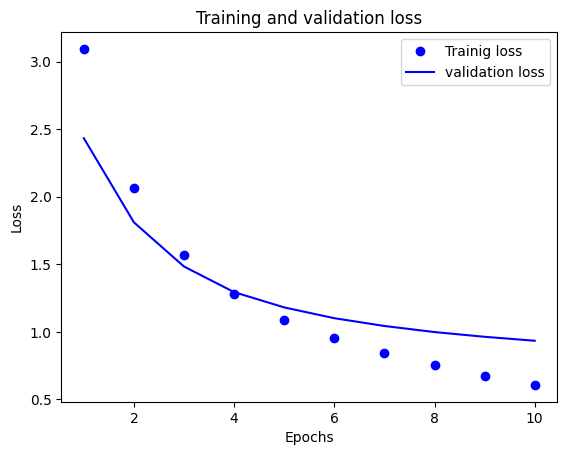

In [49]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Trainig loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

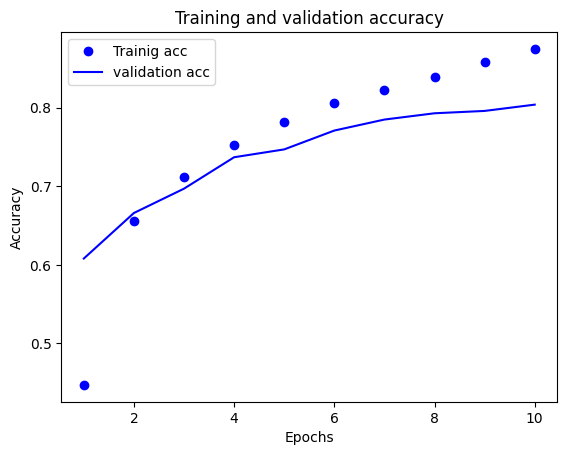

In [50]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, "bo", label="Trainig acc")
plt.plot(epochs, val_accuracy_values, "b", label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [61]:
result = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.8041
